# **Sentiment Analysis on COVID Vaccination**

**Data source **

https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets?select=vaccination_all_tweets.csv

In [ ]:
import re #regular expression specifies a set of strings that matches it(the functions in this module let us check if a particular string matches a given regular expression)
import string #Utility function in this string module split the specified string into words using str.split().
import pandas as pd #this  library  provides ready to use high-performance data structures and data analysis tools.
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
%matplotlib inline 
from plotly import graph_objs as go 

import plotly.express as px
import collections 

import nltk
from nltk.corpus import stopwords

import nltk
import gensim

import warnings
warnings.filterwarnings("ignore")
nltk.download('vader_lexicon')

######## VADER #####
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
Covid_Vaccinetweets = pd.read_csv('/content/drive/MyDrive/vaccination_all_tweets.csv')
Covid_Vaccinetweets.head(10)

id             user_name  ... favorites is_retweet
0  1340539111971516416            Rachel Roh  ...         0      False
1  1338158543359250433           Albert Fong  ...         1      False
2  1337858199140118533              eli🇱🇹🇪🇺👌  ...         0      False
3  1337855739918835717         Charles Adler  ...      2129      False
4  1337854064604966912  Citizen News Channel  ...         0      False
5  1337852648389832708                   Dee  ...         0      False
6  1337851215875608579     Gunther Fehlinger  ...         4      False
7  1337850832256176136   Dr.Krutika Kuppalli  ...        22      False
8  1337850023531347969           Erin Despas  ...         1      False
9  1337842295857623042          Ch.Amjad Ali  ...         0      False

[10 rows x 16 columns]

In [ ]:
print(Covid_Vaccinetweets['id'].nunique())
print(Covid_Vaccinetweets['user_name'].nunique())
print(Covid_Vaccinetweets['user_location'].nunique())
print(Covid_Vaccinetweets['user_description'].nunique())
print(Covid_Vaccinetweets['user_created'].nunique())
print(Covid_Vaccinetweets['user_friends'].nunique())
print(Covid_Vaccinetweets['user_favourites'].nunique())
print(Covid_Vaccinetweets['user_verified'].nunique())
print(Covid_Vaccinetweets['date'].nunique())
print(Covid_Vaccinetweets['text'].nunique())
print(Covid_Vaccinetweets['hashtags'].nunique())
print(Covid_Vaccinetweets['source'].nunique())
print(Covid_Vaccinetweets['retweets'].nunique())
print(Covid_Vaccinetweets['favorites'].nunique())
print(Covid_Vaccinetweets['is_retweet'].nunique())

69718
37139
12761
35883
37789
6052
22440
2
68930
69621
23965
211
300
636
1


Is there any null value?

In [ ]:
Covid_Vaccinetweets["text"].isnull().sum()

0

In [ ]:
Covid_Vaccinetweets = Covid_Vaccinetweets.drop(['id','user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified','hashtags','source','retweets','favorites','is_retweet'], axis=1)


In [ ]:
Covid_Vaccinetweets.head(5)

date                                               text
0  2020-12-20 06:06:44  same folks said daikon paste could treat a cyt...
1  2020-12-13 16:27:13  while the world has been on the wrong side of ...
2  2020-12-12 20:33:45   coronavirus sputnikv astrazeneca pfizerbionte...
3  2020-12-12 20:23:59  facts are immutable senator even when you re n...
4  2020-12-12 20:17:19  explain to me again why we need a vaccine wher...

In [ ]:
Covid_Vaccinetweets.describe()

date                                               text
count                 69718                                              69718
unique                68930                                              69621
top     2021-04-21 12:30:00  Got my second dose of the #Moderna #vaccine to...
freq                      4                                                 16

In [ ]:
Covid_Vaccinetweets.info

<bound method DataFrame.info of                                                     text
0      Same folks said daikon paste could treat a cyt...
1      While the world has been on the wrong side of ...
2      #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3      Facts are immutable, Senator, even when you're...
4      Explain to me again why we need a vaccine @Bor...
...                                                  ...
69713  ✅ 🇷🇺#Gamaleya Research Center in cooperation w...
69714  @FloydShivambu #SputnikV. Where are #AfricanEx...
69715  Hello, it s because of this stubbornness and f...
69716  In a lengthy interview on #wato some months ag...
69717  “First they ignore you\nthen they laugh at you...

[69718 rows x 1 columns]>

**Data Pre-Processing**

In [ ]:
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\%]', '', text)
    text = re.sub('@[\w]+','',text)
    text = re.sub('@?[^\w]+',' ',text)
    #text = re.sub('^rt ','',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?%>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"@(\w+)", ' ', text, flags=re.MULTILINE)
    return text

In [ ]:
Covid_Vaccinetweets['text'] = Covid_Vaccinetweets['text'].apply(lambda x:clean_text(x))

In [ ]:
Covid_Vaccinetweets.head(5)

date                                               text
0  2020-12-20 06:06:44  same folks said daikon paste could treat a cyt...
1  2020-12-13 16:27:13  while the world has been on the wrong side of ...
2  2020-12-12 20:33:45   coronavirus sputnikv astrazeneca pfizerbionte...
3  2020-12-12 20:23:59  facts are immutable senator even when you re n...
4  2020-12-12 20:17:19  explain to me again why we need a vaccine wher...

In [ ]:
Covid_Vaccinetweets['word_count'] = Covid_Vaccinetweets['text'].apply(lambda x : len(x.split()))
Covid_Vaccinetweets['char_count'] = Covid_Vaccinetweets['text'].apply(lambda x : len(x.replace(" ","")))
Covid_Vaccinetweets['word_density'] = Covid_Vaccinetweets['word_count'] / Covid_Vaccinetweets['char_count'] + 1

In [ ]:
Covid_Vaccinetweets.head()

date  ... word_density
0  2020-12-20 06:06:44  ...     1.200000
1  2020-12-13 16:27:13  ...     1.225225
2  2020-12-12 20:33:45  ...     1.161290
3  2020-12-12 20:23:59  ...     1.224490
4  2020-12-12 20:17:19  ...     1.168539

[5 rows x 5 columns]

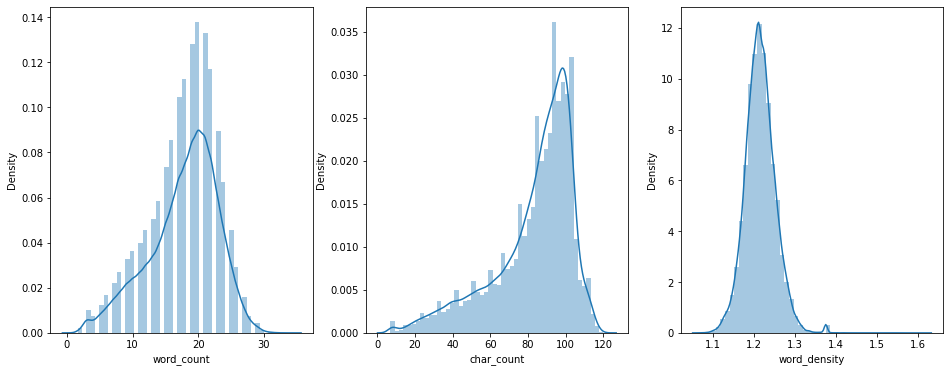

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
dp=sns.distplot(Covid_Vaccinetweets['word_count'],ax=ax[0])
dp=sns.distplot(Covid_Vaccinetweets['char_count'],ax=ax[1])
dp=sns.distplot(Covid_Vaccinetweets['word_density'],ax=ax[2])
plt.show()

In [ ]:
sentiments = []
for count,text in enumerate(Covid_Vaccinetweets.text):
    sentiments.append(vader.polarity_scores(text))
    print(count,vader.polarity_scores(text))

Streaming output truncated to the last 5000 lines.
64718 {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5719}
64719 {'neg': 0.326, 'neu': 0.487, 'pos': 0.187, 'compound': -0.7433}
64720 {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.34}
64721 {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.4877}
64722 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
64723 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
64724 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
64725 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
64726 {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.6948}
64727 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
64728 {'neg': 0.09, 'neu': 0.815, 'pos': 0.094, 'compound': 0.0258}
64729 {'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'compound': -0.2263}
64730 {'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.7351}
64731 {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}
64732 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compo

In [ ]:
len(sentiments)

69718

In [ ]:
target = []
for count,sentiment in enumerate(sentiments):
    print(count)
    if sentiment['compound'] >= 0.05: 
        print("Positive")
        target.append('POSITIVE')
    elif sentiment['compound'] <= -0.05 : 
        print("Negative")
        target.append('NEGATIVE')
    else: 
        print("Neutral")
        target.append('NEUTRAL')

Streaming output truncated to the last 5000 lines.
67218
Positive
67219
Positive
67220
Negative
67221
Positive
67222
Positive
67223
Negative
67224
Neutral
67225
Positive
67226
Neutral
67227
Neutral
67228
Positive
67229
Neutral
67230
Positive
67231
Negative
67232
Neutral
67233
Neutral
67234
Neutral
67235
Positive
67236
Neutral
67237
Positive
67238
Negative
67239
Positive
67240
Positive
67241
Positive
67242
Positive
67243
Negative
67244
Positive
67245
Neutral
67246
Neutral
67247
Neutral
67248
Neutral
67249
Neutral
67250
Positive
67251
Neutral
67252
Neutral
67253
Positive
67254
Negative
67255
Neutral
67256
Neutral
67257
Neutral
67258
Neutral
67259
Negative
67260
Positive
67261
Positive
67262
Positive
67263
Positive
67264
Neutral
67265
Positive
67266
Neutral
67267
Neutral
67268
Negative
67269
Positive
67270
Neutral
67271
Neutral
67272
Negative
67273
Positive
67274
Neutral
67275
Positive
67276
Negative
67277
Neutral
67278
Positive
67279
Positive
67280
Neutral
67281
Positive
67282
Neutral
67

In [ ]:
target = pd.DataFrame(target, columns=['target'])
target

target
0      POSITIVE
1      NEGATIVE
2      POSITIVE
3       NEUTRAL
4       NEUTRAL
...         ...
69713   NEUTRAL
69714   NEUTRAL
69715  NEGATIVE
69716   NEUTRAL
69717  POSITIVE

[69718 rows x 1 columns]

In [ ]:
Covid_Vaccinetweets = pd.concat([Covid_Vaccinetweets, target], axis = 1)

In [ ]:
Covid_Vaccinetweets.head(5)

date  ...    target
0  2020-12-20 06:06:44  ...  POSITIVE
1  2020-12-13 16:27:13  ...  NEGATIVE
2  2020-12-12 20:33:45  ...  POSITIVE
3  2020-12-12 20:23:59  ...   NEUTRAL
4  2020-12-12 20:17:19  ...   NEUTRAL

[5 rows x 6 columns]

**Data Visulization**

In [ ]:
temp = Covid_Vaccinetweets.groupby('target').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

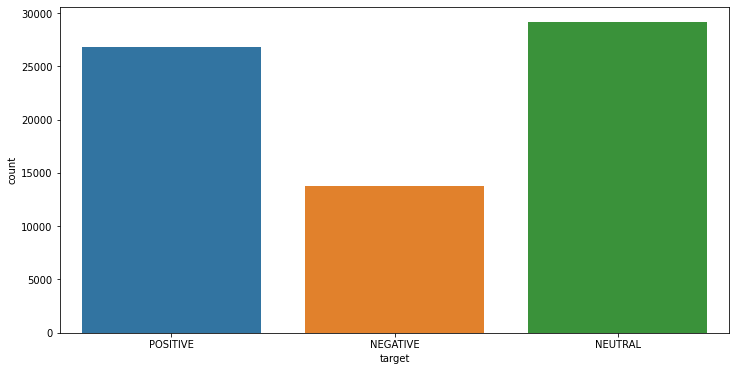

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='target',data=Covid_Vaccinetweets)

In [ ]:
fig = go.Figure(go.Funnelarea(
    text = temp.target,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

**Word Count**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
split_words = []
top = []
for text in Covid_Vaccinetweets.text:
    top.append(text)
top = str(top)
tweet = str(Covid_Vaccinetweets.text)
top

"['same folks said daikon paste could treat a cytokine storm pfizerbiontech https t co ', 'while the world has been on the wrong side of history this year hopefully the biggest vaccination effort we ve ev https t co dlchrzjkhm', ' coronavirus sputnikv astrazeneca pfizerbiontech moderna  russian vaccine is created to last   years https t co ', 'facts are immutable senator even when you re not ethically sturdy enough to acknowledge them  you were born i https t co ', 'explain to me again why we need a vaccine whereareallthesickpeople pfizerbiontech https t co kxbsrobehq', 'does anyone have any useful advice guidance for whether the covid vaccine is safe whilst breastfeeding https t co eifsyqoekn', 'it is a bit sad to claim the fame for success of vaccination on patriotic competition between usa canada uk and https t co ifmraygytp', 'there have not been many bright days in  but here are some of the best  bidenharris winning  https t co ', 'covid vaccine you getting it covidvaccine  pfizer

In [ ]:
wordcount = {}
for word in tweet.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    word = word.replace("rt","")
    word = word.replace("","")
    if word not in stop_words:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

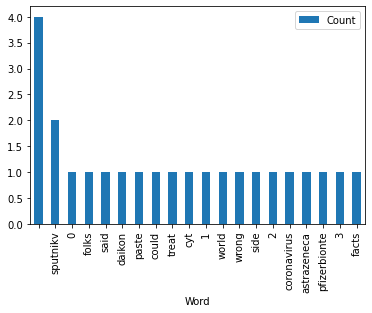

In [ ]:
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(20)
temp = pd.DataFrame(lst, columns = ['Word', 'Count'])
temp.plot.bar(x='Word',y='Count')
temp.columns = ['Word','Count']
temp.style.background_gradient(cmap='Purples')

In [ ]:
my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'a',' a ',' a','a ''below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
Covid_Vaccinetweets['Text_new'] = Covid_Vaccinetweets['text'].apply(lambda x:' '.join([word for word in x.split() if word not in  (my_stopwords)]))

In [ ]:
Covid_Vaccinetweets.text.count()

69718

In [ ]:
Covid_Vaccinetweets.Text_new.count()

69718

In [ ]:
Covid_Vaccinetweets.head(5)

date  ...                                           Text_new
0  2020-12-20 06:06:44  ...  folks said daikon paste could treat cytokine s...
1  2020-12-13 16:27:13  ...  world wrong side history year hopefully bigges...
2  2020-12-12 20:33:45  ...  coronavirus sputnikv astrazeneca pfizerbiontec...
3  2020-12-12 20:23:59  ...  facts immutable senator even ethically sturdy ...
4  2020-12-12 20:17:19  ...  explain need vaccine whereareallthesickpeople ...

[5 rows x 7 columns]

In [ ]:
fig = px.bar(temp, x="Word", y="Count", title='Commmon Words in Selected Text', orientation='v', 
             width=700, height=700,color='Count')
fig.show()


Word2Vec Embeddings

In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)
                  

In [ ]:
%%time
documents = [_text.split() for _text in Covid_Vaccinetweets.Text_new] 

CPU times: user 244 ms, sys: 41.4 ms, total: 286 ms
Wall time: 287 ms


In [ ]:
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 5376


**Timeline showing sentiment of tweets about covid-19 vaccines**

In [ ]:
# Convert dates
Covid_Vaccinetweets['date'] = pd.to_datetime(Covid_Vaccinetweets['date'], errors='coerce').dt.date

# Get counts of number of tweets by sentiment for each date
#timeline = Covid_Vaccinetweets.groupby(['date', 'target']).agg(**{'text': ('id', 'count')}).reset_index().dropna()
timeline = Covid_Vaccinetweets.groupby(['date', 'target']).count()['text'].reset_index().dropna()

fig = px.line(timeline, x='date', y='text', color='target', color_discrete_sequence=["#EF553B", "#636EFA", "#00CC96"], category_orders={'target': ['neutral', 'negative', 'positive']},
             title='Timeline showing sentiment of tweets about COVID-19 vaccines')
fig.show()

In [ ]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    title_str = 'Timeline showing sentiment of tweets about the '+title+' vaccine'
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
        df_filt = df_filt.drop_duplicates()
   #timeline = df_filt.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index()
    timeline = df_filt.groupby(['date', 'target']).count()['text'].reset_index().dropna()
    fig = px.line(timeline, x='date', y='text', color='target', category_orders={'target': ['neutral', 'negative', 'positive']},title=title_str)
    fig.show()
    return df_filt

covaxin = filtered_timeline(Covid_Vaccinetweets, ['covaxin'], title='Covaxin')
sinovac = filtered_timeline(Covid_Vaccinetweets, ['sinovac'], title='Sinovac')
sinopharm = filtered_timeline(Covid_Vaccinetweets, ['sinopharm'], title='Sinopharm')
moderna = filtered_timeline(Covid_Vaccinetweets, ['moderna'], title='Moderna')
sputnikv = filtered_timeline(Covid_Vaccinetweets, ['sputnik'], title='Sputnik V')
oxford = filtered_timeline(Covid_Vaccinetweets, ['oxford', 'astrazeneca'], title='Oxford/AstraZeneca')
pfizer = filtered_timeline(Covid_Vaccinetweets, ['pfizer', 'biontech'], title='Pfizer/BioNTech')



Z scores of negative sentiment for each vaccine:


Text(0.5, 0, 'Z score')

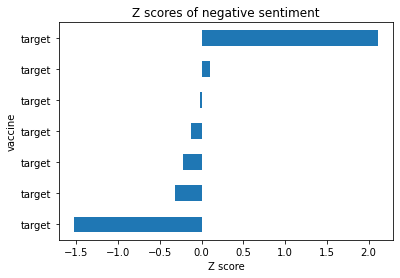

In [ ]:
# Get z scores of sentiment for each vaccine
vax_names = {'Covaxin': covaxin, 'Sputnik V': sputnikv, 'Sinovac': sinovac, 'Sinopharm': sinopharm,
            'Moderna': moderna, 'Oxford/AstraZeneca': oxford, 'PfizerBioNTech': pfizer}
sentiment_zscores = pd.DataFrame()
for k, v in vax_names.items():
    senti = v['target'].value_counts(normalize=True)
    senti['vaccine'] = k
    sentiment_zscores = sentiment_zscores.append(senti)
for col in ['NEGATIVE','NEUTRAL','POSITIVE']:
    #col_zscore = col + '_zscore'
    sentiment_zscores[col + '_zscore'] = (sentiment_zscores[col] - sentiment_zscores[col].mean())/sentiment_zscores[col].std(ddof=0)
    sentiment_zscores.set_index('vaccine')

# Plot the results
ax = sentiment_zscores.sort_values('NEGATIVE_zscore')['NEGATIVE_zscore'].plot.barh(title='Z scores of negative sentiment')
ax.set_ylabel('vaccine')
ax.set_xlabel('Z score')

In [ ]:
senti

NEUTRAL           0.435454
POSITIVE          0.401102
NEGATIVE          0.163444
vaccine     PfizerBioNTech
Name: target, dtype: object

In [ ]:
sentiment_zscores

NEGATIVE   NEUTRAL  ...  NEUTRAL_zscore POSITIVE_zscore
target  0.151672  0.455125  ...       -0.148504        0.556385
target  0.171688  0.431053  ...       -0.448265        0.641752
target  0.158357  0.547667  ...        1.003873       -1.532229
target  0.102031  0.607110  ...        1.744097       -1.597863
target  0.162307  0.454040  ...       -0.162025        0.355386
target  0.253754  0.338908  ...       -1.595714        0.853916
target  0.163444  0.435454  ...       -0.393461        0.722653

[7 rows x 7 columns]

**Tweets contain pfizer** 




In [ ]:
Covid_Vaccinetweets[Covid_Vaccinetweets['text'].str.lower().str.contains("pfizer")].head(10)

date  ...    target
0   2020-12-20  ...  POSITIVE
2   2020-12-12  ...  POSITIVE
4   2020-12-12  ...   NEUTRAL
8   2020-12-12  ...   NEUTRAL
10  2020-12-12  ...   NEUTRAL
11  2020-12-12  ...  POSITIVE
13  2020-12-12  ...  POSITIVE
16  2020-12-12  ...   NEUTRAL
17  2020-12-12  ...   NEUTRAL
21  2020-12-12  ...  POSITIVE

[10 rows x 6 columns]

**Tweets contain sputnik**

In [ ]:
Covid_Vaccinetweets[Covid_Vaccinetweets['text'].str.lower().str.contains("sputnik")].head(10)

date  ...    target
2     2020-12-12  ...  POSITIVE
234   2020-12-13  ...   NEUTRAL
303   2020-12-12  ...  POSITIVE
550   2020-12-16  ...   NEUTRAL
849   2020-12-18  ...   NEUTRAL
961   2020-12-19  ...  POSITIVE
975   2020-12-24  ...   NEUTRAL
1218  2020-12-24  ...  POSITIVE
1587  2020-12-26  ...  NEGATIVE
1787  2020-12-29  ...  POSITIVE

[10 rows x 6 columns]

**Tweets contain covaxin**

In [ ]:
Covid_Vaccinetweets[Covid_Vaccinetweets['text'].str.lower().str.contains("covaxin")].head(10)

date  ...    target
1823  2020-12-30  ...   NEUTRAL
2213  2021-01-03  ...  POSITIVE
2356  2021-01-05  ...  POSITIVE
2383  2021-01-05  ...  POSITIVE
2434  2021-01-06  ...  POSITIVE
2758  2021-01-07  ...   NEUTRAL
3575  2021-01-16  ...  NEGATIVE
3830  2021-01-16  ...   NEUTRAL
3844  2021-01-16  ...   NEUTRAL
3853  2021-01-18  ...   NEUTRAL

[10 rows x 6 columns]

**WORD CLOUDS**

In [ ]:
!pip install wordninja pyspellchecker
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")
import math
import random

     |████████████████████████████████| 542kB 2.9MB/s 
     |████████████████████████████████| 2.7MB 28.3MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-cp37-none-any.whl size=541554 sha256=1cd2b5bab8bdec2b9251091b06d6159e14ffdba9b0c6f17a90aa2648d2a93786
  Stored in directory: /root/.cache/pip/wheels/22/46/06/9b6d10ed02c85e93c3bb33ac50e2d368b2586248f192a2e22a
Successfully built wordninja
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# FUNCTIONS REQUIRED

def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(3,1, figsize=(15,15))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show();

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    
    return top_n_words
    
def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud


In [ ]:
Covid_Vaccinetweets['words'] = Covid_Vaccinetweets.text.apply(lambda x:re.findall(r'\w+', x ))
Covid_Vaccinetweets

date  ...                                              words
0      2020-12-20  ...  [same, folks, said, daikon, paste, could, trea...
1      2020-12-13  ...  [while, the, world, has, been, on, the, wrong,...
2      2020-12-12  ...  [coronavirus, sputnikv, astrazeneca, pfizerbio...
3      2020-12-12  ...  [facts, are, immutable, senator, even, when, y...
4      2020-12-12  ...  [explain, to, me, again, why, we, need, a, vac...
...           ...  ...                                                ...
69713  2021-04-14  ...  [gamaleya, research, center, in, cooperation, ...
69714  2021-04-14  ...  [sputnikv, where, are, africanexpertise, medic...
69715  2021-04-14  ...  [hello, it, s, because, of, this, stubbornness...
69716  2021-04-14  ...  [in, a, lengthy, interview, on, wato, some, mo...
69717  2021-04-14  ...  [first, they, ignore, you, then, they, laugh, ...

[69718 rows x 7 columns]

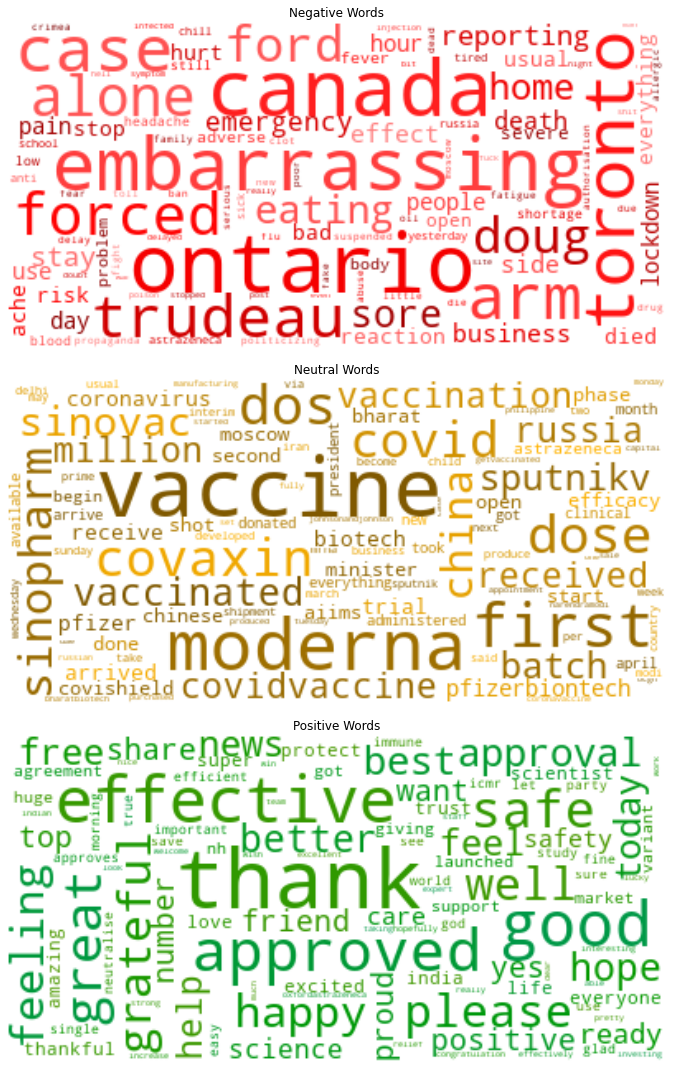

In [ ]:
# Convert string to a list of words
#Covid_Vaccinetweets['words'] = Covid_Vaccinetweets.text.apply(lambda x:re.findall(r'\w+', x ))

def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['target']=='NEGATIVE']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['target']=='POSITIVE']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['target']=='NEUTRAL']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    
get_smart_clouds(Covid_Vaccinetweets)